# **Assignment 4: Decision Tree and Naïve Cross-validation**

Mitch Messier - September 13th, 2023

# Table of Contents

1. **Task I:** Set up, Data import, and Preparation
2. **Task II:** Simple Decision Tree Training and Testing
3. **Task III:** Simple Naïve Bayes Model Training and Testing
4. **Task IV:** 5-fold and 10-fold decision tree and naive Bayes evaluation performance with sklearn's cross_validate()

# Data Import

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

from sklearn.naive_bayes import CategoricalNB
from sklearn.model_selection import cross_validate

# **Task I:** Set up, Data import, and Preparation

**1A**

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/matthewpecsok/4482_fall_2022/main/data/CD_additional_modified.csv")

**1B**

In [ ]:
data = data.select_dtypes(exclude = ['int64', 'float64'])

In [ ]:
y_target = data.pop('y')
y_target = y_target.eq('yes').mul(1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4117 entries, 0 to 4116
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          4117 non-null   object
 1   marital      4117 non-null   object
 2   education    4117 non-null   object
 3   default      4117 non-null   object
 4   housing      4117 non-null   object
 5   loan         4117 non-null   object
 6   contact      4117 non-null   object
 7   month        4117 non-null   object
 8   day_of_week  4117 non-null   object
 9   poutcome     4117 non-null   object
dtypes: object(10)
memory usage: 321.8+ KB


In [ ]:
data.describe()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,4117,4117,4117,4117,4117,4117,4117,4117,4117,4117
unique,12,4,7,2,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,1012,2508,1264,3314,2175,3347,2650,1378,860,3522


In [ ]:
data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,nonexistent
1,services,single,high.school,no,no,no,telephone,may,fri,nonexistent
2,services,married,high.school,no,yes,no,telephone,jun,wed,nonexistent
3,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,nonexistent
4,admin.,married,university.degree,no,yes,no,cellular,nov,mon,nonexistent


In [ ]:
encoded_data = pd.get_dummies(data)

**1C**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(encoded_data, y_target, train_size = 0.7, random_state = 42)

**1D**

In [ ]:
def print_target_distribution(y, title):
    value_counts = y.value_counts(normalize=True)
    print(title)
    print("Target Variable Distribution:")
    for category, percentage in value_counts.items():
      print(f"{category}: {percentage * 100:.2f}%")
    print("\n")

In [ ]:
print_target_distribution(y_target, 'Whole Data Frame')
print_target_distribution(y_train, 'Training Set')
print_target_distribution(y_test, 'Test Set')

Whole Data Frame
Target Variable Distribution:
0: 89.05%
1: 10.95%


Training Set
Target Variable Distribution:
0: 88.75%
1: 11.25%


Test Set
Target Variable Distribution:
0: 89.72%
1: 10.28%




**1E**

This dataset is different because we are dropping numeric columns which will eventually transform what we see on the back end within our classification metrics. Additioanlly, the target variable has been dummy encoded and turned into 0's and 1's while on the last assignment it remained 'yes' and 'no.' Last, the sample size of the dataset is reduced considering we removed so many numeric variables.

# **Task II:** Simple Decision Tree Training and Testing

In [ ]:
tree_model = DecisionTreeClassifier(random_state = 42, ccp_alpha = 0.05, criterion='entropy')

In [ ]:
tree_model.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy', random_state=42)

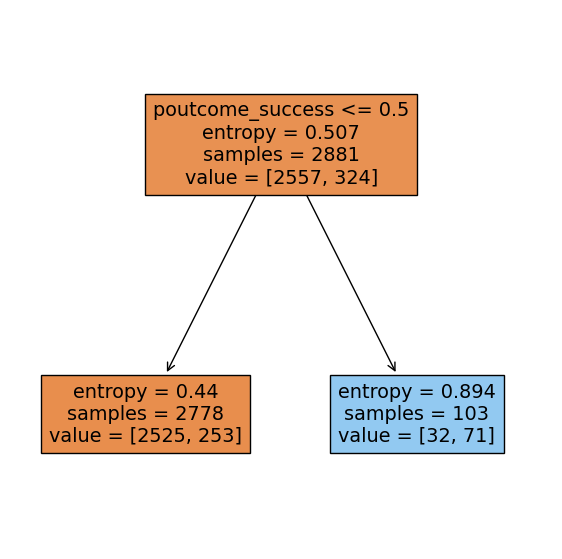

In [ ]:
plt.figure(figsize = (7,7))
plot_tree(tree_model, filled = True, feature_names = encoded_data.columns.to_list())
plt.show()

In [ ]:
y_train_pred = tree_model.predict(x_train)

In [ ]:
y_test_pred = tree_model.predict(x_test)

In [ ]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_report_train = classification_report(y_train, y_train_pred)

In [ ]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

In [ ]:
print("Confusion Matrix (Training Data):\n", confusion_matrix_train)
print("\nClassification Report (Training Data):\n", classification_report_train)

print("\nConfusion Matrix (Testing Data):\n", confusion_matrix_test)
print("\nClassification Report (Testing Data):\n", classification_report_test)

Confusion Matrix (Training Data):
 [[2525   32]
 [ 253   71]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.91      0.99      0.95      2557
           1       0.69      0.22      0.33       324

    accuracy                           0.90      2881
   macro avg       0.80      0.60      0.64      2881
weighted avg       0.88      0.90      0.88      2881


Confusion Matrix (Testing Data):
 [[1091   18]
 [ 106   21]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.91      0.98      0.95      1109
           1       0.54      0.17      0.25       127

    accuracy                           0.90      1236
   macro avg       0.72      0.57      0.60      1236
weighted avg       0.87      0.90      0.87      1236



# **Task III:** Simple Naïve Bayes Model Training and Testing

In [ ]:
naive_bayes_model = CategoricalNB()

In [ ]:
naive_bayes_model.fit(x_train, y_train)

CategoricalNB()

In [ ]:
y_train_pred = naive_bayes_model.predict(X_train)

In [ ]:
y_test_pred = naive_bayes_model.predict(X_test)

In [ ]:
confusion_matrix_train = confusion_matrix(y_train, y_train_pred)
classification_report_train = classification_report(y_train, y_train_pred)


In [ ]:
confusion_matrix_test = confusion_matrix(y_test, y_test_pred)
classification_report_test = classification_report(y_test, y_test_pred)

In [ ]:
print("\nConfusion Matrix (Training Data):\n", confusion_matrix_train)
print("\nClassification Report (Training Data):\n", classification_report_train)

print("\nConfusion Matrix (Testing Data):\n", confusion_matrix_test)
print("\nClassification Report (Testing Data):\n", classification_report_test)


Confusion Matrix (Training Data):
 [[2416  141]
 [ 205  119]]

Classification Report (Training Data):
               precision    recall  f1-score   support

           0       0.92      0.94      0.93      2557
           1       0.46      0.37      0.41       324

    accuracy                           0.88      2881
   macro avg       0.69      0.66      0.67      2881
weighted avg       0.87      0.88      0.87      2881


Confusion Matrix (Testing Data):
 [[1042   67]
 [  80   47]]

Classification Report (Testing Data):
               precision    recall  f1-score   support

           0       0.93      0.94      0.93      1109
           1       0.41      0.37      0.39       127

    accuracy                           0.88      1236
   macro avg       0.67      0.65      0.66      1236
weighted avg       0.88      0.88      0.88      1236



# **Task IV:** 5-fold and 10-fold decision tree and naive Bayes evaluation performance with sklearn's cross_validate()

**Decision Tree Model**

In [ ]:
decision_tree_model = tree_model

In [ ]:
five_fold = cross_validate(decision_tree_model, encoded_data, y_target, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
 ten_fold = cross_validate(decision_tree_model, encoded_data, y_target, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defin

In [ ]:
print("5-Fold Cross-Validation Results for Decision Tree:")
print("Accuracy:", five_fold['test_accuracy'])
print("Precision:", five_fold['test_precision'])
print("Recall:", five_fold['test_recall'])
print("F1 Score:", five_fold['test_f1'])

print("\n10-Fold Cross-Validation Results for Decision Tree:")
print("Accuracy:", ten_fold['test_accuracy'])
print("Precision:", ten_fold['test_precision'])
print("Recall:", ten_fold['test_recall'])
print("F1 Score:", ten_fold['test_f1'])

5-Fold Cross-Validation Results for Decision Tree:
Accuracy: [0.8907767  0.88956311 0.89064399 0.89064399 0.89064399]
Precision: [0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0.]

10-Fold Cross-Validation Results for Decision Tree:
Accuracy: [0.8907767  0.8907767  0.8907767  0.8907767  0.8907767  0.8907767
 0.88834951 0.89051095 0.89051095 0.89051095]
Precision: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Recall: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
F1 Score: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


**Naive Bayes Model**

In [ ]:
categorical_naive_bayes_model = naive_bayes_model

In [ ]:
cv_results_5_fold = cross_validate(categorical_naive_bayes_model, encoded_data, y_target, cv=5, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
cv_results_10_fold = cross_validate(categorical_naive_bayes_model, encoded_data, y_target, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
print("5-Fold Cross-Validation Results for Naïve Bayes:")
print("Accuracy:", cv_results_5_fold['test_accuracy'])
print("Precision:", cv_results_5_fold['test_precision'])
print("Recall:", cv_results_5_fold['test_recall'])
print("F1 Score:", cv_results_5_fold['test_f1'])

print("\n10-Fold Cross-Validation Results for Naïve Bayes:")
print("Accuracy:", cv_results_10_fold['test_accuracy'])
print("Precision:", cv_results_10_fold['test_precision'])
print("Recall:", cv_results_10_fold['test_recall'])
print("F1 Score:", cv_results_10_fold['test_f1'])

5-Fold Cross-Validation Results for Naïve Bayes:
Accuracy: [0.88349515 0.87985437 0.88092345 0.88699878 0.87484812]
Precision: [0.46052632 0.43939394 0.44594595 0.47457627 0.42352941]
Recall: [0.38888889 0.31868132 0.36666667 0.31111111 0.4       ]
F1 Score: [0.42168675 0.36942675 0.40243902 0.37583893 0.41142857]

10-Fold Cross-Validation Results for Naïve Bayes:
Accuracy: [0.89563107 0.87135922 0.88592233 0.87378641 0.88834951 0.87621359
 0.85436893 0.9026764  0.87347932 0.87591241]
Precision: [0.52173913 0.38235294 0.47058824 0.37931034 0.48571429 0.42105263
 0.29411765 0.5862069  0.41025641 0.43478261]
Recall: [0.53333333 0.28888889 0.35555556 0.24444444 0.37777778 0.35555556
 0.2173913  0.37777778 0.35555556 0.44444444]
F1 Score: [0.52747253 0.32911392 0.40506329 0.2972973  0.425      0.38554217
 0.25       0.45945946 0.38095238 0.43956044]


# Convert to HTML File

In [ ]:
# Insert a code cell to include to following line of command in each
# Colab notebook to access data files saved in Google Drive of your account
# Retrieve csv file from google drive by mapping the folder from google drive.
# Must be done each time session expires.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# copy the ipynb to the local working directory
# This file name must change to be the name of your Lab file!
!cp "/content/drive/MyDrive/Colab Notebooks/A4_Messier_Mitch.ipynb" ./

# create html from ipynb
!jupyter nbconvert --to html "A4_Messier_Mitch.ipynb"

cp: cannot stat '/content/drive/MyDrive/Colab Notebooks/A4_Messier_Mitch.ipynb': No such file or directory
[NbConvertApp] WARNING | pattern 'A4_Messier_Mitch.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    A